In [181]:
# Import the regular libraries. 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm 

# Import the k nearest neighbor libraries. 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.patches as mpatches 
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score, train_test_split 
%matplotlib inline 

# Import the analysis libraries. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report 

# Import the naive bayes libraries. 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 
kickstarter = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/kickstarter-projects-201518.csv", encoding="ISO-8859-1") # USE YOUR OWN Github
kickstarter.dropna(inplace=True)
kickstarter = kickstarter.rename(columns = {'usd pledged': 'usd_pledged'})

In [182]:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1008941852,The return of BABY UNIVERSE!,Immersive,Theater,USD,1/1/2015,15000,12/4/2014 21:37,11880.18,failed,46,US,11880.18,11880.18,15000.00
1,1013503401,Potjie,Drama,Film & Video,GBP,1/1/2015,4500,12/2/2014 18:10,4843.00,successful,67,GB,7560.32,7477.46,6947.88
2,1020446396,Stilt City- A Bungalow Artist Space in The Roc...,Public Art,Art,USD,1/1/2015,60000,11/19/2014 23:14,18087.00,canceled,204,US,18087.00,18087.00,60000.00
3,1028008131,A 2D SideScroller RPG Made by YOU (Canceled),Video Games,Games,USD,1/1/2015,20000,12/2/2014 22:02,9.00,canceled,2,US,9.00,9.00,20000.00
4,1049544313,Balteus Belt,Apparel,Fashion,USD,1/1/2015,8000,11/18/2014 21:17,1563.00,failed,16,US,1563.00,1563.00,8000.00


In [183]:
bins = np.linspace(kickstarter.ID.min(),kickstarter.goal.max(),4)
bins

array([1.852000e+04, 3.334568e+07, 6.667284e+07, 1.000000e+08])

In [184]:
labels = ['low', 'medium', 'high']

In [185]:
kickstarter2=kickstarter
kickstarter2['bins'] = pd.cut(kickstarter2['ID'], bins=bins, labels=labels, include_lowest=True)

In [186]:
kickstarter2.groupby(['bins']).count()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
bins,,,,,,,,,,,,,,,
low,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834
medium,2907,2907,2907,2907,2907,2907,2907,2907,2907,2907,2907,2907,2907,2907,2907
high,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891


In [187]:
kickstarter = pd.DataFrame(kickstarter, columns = ['ID', 'goal', 'pledged','backers','state'])
kickstarter.head()

,ID,goal,pledged,backers,state
0,1008941852,15000,11880.18,46,failed
1,1013503401,4500,4843.00,67,successful
2,1020446396,60000,18087.00,204,canceled
3,1028008131,20000,9.00,2,canceled
4,1049544313,8000,1563.00,16,failed


In [188]:
kickstarter.state.unique()

array(['failed', 'successful', 'canceled', 'suspended', 'live'],
      dtype=object)

In [189]:
pip install pandas-profiling # installing the current GA version

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [190]:
x=kickstarter.iloc[:,:3] # all parameters
y=kickstarter['state']

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

# So, what training data do we have?
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (141333, 3)
y_train shape: (141333,)


In [192]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (47112, 3)
y_test shape: (47112,)


2. Creating a 2/3 to 1/3 split between training and test dataset

In [193]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (126258, 3)
y_train shape: (126258,)
X_test shape: (62187, 3)
y_test shape: (62187,)


3. Running k Nearest Neighbor with k =1

In [194]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [195]:
y_pred = model1.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 ['failed' 'successful' 'failed' ... 'failed' 'canceled' 'canceled']


3. a) Calculating the Accuracy score

In [196]:
# Accuracy score
print("Test set score: {:.2f}".format(model1.score(X_test, y_test)))

Test set score: 0.47


In [197]:
realvsmodel1 = pd.DataFrame(y_pred,y_test)
realvsmodel1 = pd.DataFrame({'predicted':y_pred,'original':y_test})
realvsmodel1.head()

,predicted,original
150033,failed,failed
183246,successful,successful
25510,failed,failed
65031,failed,failed
126005,successful,successful


3. b) creating the confusion matrix and classification report

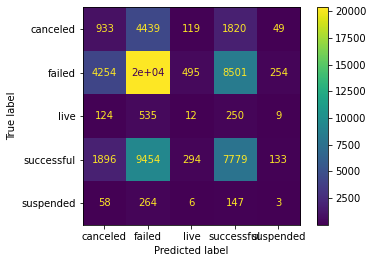

In [198]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model1.classes_).plot()

In [199]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=['failed', 'successful', 'canceled', 'suspended', 'live']))

              precision    recall  f1-score   support

      failed       0.58      0.60      0.59     33863
  successful       0.42      0.40      0.41     19556
    canceled       0.13      0.13      0.13      7360
   suspended       0.01      0.01      0.01       478
        live       0.01      0.01      0.01       930

    accuracy                           0.47     62187
   macro avg       0.23      0.23      0.23     62187
weighted avg       0.46      0.47      0.47     62187



4. optimizing k for the k nearest neighbor

In [200]:
# To determine how to pick k, we are first creating a list of potential k values
klist = list(range(1,50,2)) # Our list goes from 1 to 50 in increments of 2

# Then we create an empty list that will hold cross-validation scores
cv_scores = []

In [201]:
for k in klist:
    model10 = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model10, x, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Changing to misclassification error
errors = 1- np.array(cv_scores)

4. a) Accuracy for the k nearest neighbor

The optimal number of neighbors is 49


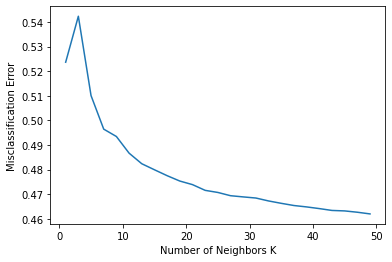

In [202]:
optimal_k = klist[np.argmin(errors)]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(klist, errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [203]:
model5 = neighbors.KNeighborsClassifier(n_neighbors=10)

model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)

4. b) Confusion matrix for the k nearest neighbor and also creating a classification report

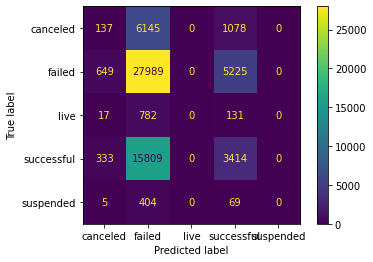

In [204]:
cm = confusion_matrix(y_test, y_pred, labels=model5.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model5.classes_).plot()

In [205]:
print(classification_report(y_test, y_pred, labels=['failed', 'successful', 'canceled', 'suspended', 'live']))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      failed       0.55      0.83      0.66     33863
  successful       0.34      0.17      0.23     19556
    canceled       0.12      0.02      0.03      7360
   suspended       0.00      0.00      0.00       478
        live       0.00      0.00      0.00       930

    accuracy                           0.51     62187
   macro avg       0.20      0.20      0.18     62187
weighted avg       0.42      0.51      0.44     62187



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. creating a confusion matrix and the classification report for the naive bayes.

In [206]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [208]:
ins_train, ins_test = train_test_split(kickstarter, test_size = 0.2)
print(ins_train)
print(ins_test)

                ID   goal  pledged  backers       state
70423   2052415988  15000      0.0        0    canceled
186864    68454164   3000   3908.0       60  successful
16319   1645999806   2150   2401.0       66  successful
190375  2075719791    360     48.0        4        live
183600  1778358521  10000    821.0        7      failed
...            ...    ...      ...      ...         ...
40746   1779049866   1000      0.0        0      failed
57158    723634704   2000    330.0        7      failed
124792  1880030516   5000  11008.0      125  successful
136428   198702316  12000    300.0        2      failed
124681   511329310  10000  76763.5      800  successful

[150756 rows x 5 columns]
                ID    goal  pledged  backers       state
190325   100822204   20000  55135.0      474        live
95755    105167689    1200      0.0        0      failed
51141    337259413    3000   3477.0       54  successful
170495  1213932792   10000   3203.0       58      failed
48712    6125910

In [209]:
ins_train_np = np.array([ins_train])
ins_test_np = np.array([ins_test])

In [210]:
ins_naivebayes = GaussianNB()
ins_naivebayes.fit(ins_train.drop('state',axis=1), ins_train['state'])

GaussianNB()

In [211]:
ins_predictions = ins_naivebayes.predict(ins_test.drop('state',axis=1))
accuracy_score(ins_test['state'], ins_predictions)

0.367348563241264

In [212]:
ins_predictions

array(['successful', 'successful', 'successful', ..., 'successful',
       'successful', 'successful'], dtype='<U10')

In [214]:
realvsmodel2 = pd.DataFrame(ins_predictions,ins_test)
realvsmodel2 = pd.DataFrame({'predicted':ins_predictions,'original':ins_test['state']})
realvsmodel2.head()

,predicted,original
190325,successful,live
95755,successful,failed
51141,successful,successful
170495,successful,failed
48712,failed,failed


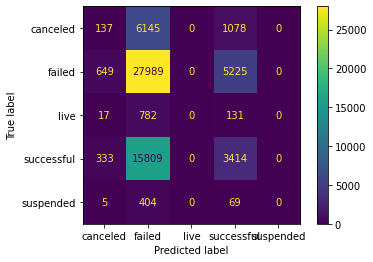

In [215]:
model6 = neighbors.KNeighborsClassifier(n_neighbors=10)

model6.fit(X_train, y_train)

y_pred = model6.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model6.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model6.classes_).plot()


In [216]:
print(classification_report(y_test, y_pred, labels=['failed', 'successful', 'canceled', 'suspended', 'live']))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      failed       0.55      0.83      0.66     33863
  successful       0.34      0.17      0.23     19556
    canceled       0.12      0.02      0.03      7360
   suspended       0.00      0.00      0.00       478
        live       0.00      0.00      0.00       930

    accuracy                           0.51     62187
   macro avg       0.20      0.20      0.18     62187
weighted avg       0.42      0.51      0.44     62187



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. By comparing the comfusion matrices we can say that the plots which we got from the results are pretty much similar to each other and when we compare the classification reports of the models we can see that the reports are same. The precision is same in all the cases  along with the recall f1-scores and support.